In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameter
Dr = 0.17
Dt = 0.2
omega = 10
v = 30
delta_t = 0.01
n_realizations = 1000

#parameter for gaussian
mu = 0
sigma = np.sqrt(delta_t)

In [3]:
#Euler scheme
def euler_one_traj(N_time, mu, sigma, delta_t, Dr):
    #initial condition
    theta_init = 0
    theta_traj = np.array([],dtype=int)
    
    theta = theta_init  
    theta_traj = np.append(theta_traj, theta)

    for i in range(N_time-1):
        s = np.random.normal(mu, sigma)
        theta = theta + omega*delta_t + np.sqrt(2*Dr)*s
        theta_traj = np.append(theta_traj,theta)
    return theta_traj


In [4]:
def traj_n_realizations(t_max):
    t_min = 0.0
    N_time = int((t_max-t_min)/delta_t +1)
    time = np.linspace(t_min, t_max, N_time)

    traj_list = []
    for n in range(n_realizations):
        traj = euler_one_traj(N_time, mu, sigma, delta_t, Dr)
        traj_list.append(traj)
    return traj_list, time

In [5]:
%%time

traj_list_1, time1 =traj_n_realizations(1)
traj_list_5, time5 =traj_n_realizations(5)
traj_list_10, time10 =traj_n_realizations(10)



Wall time: 20.6 s


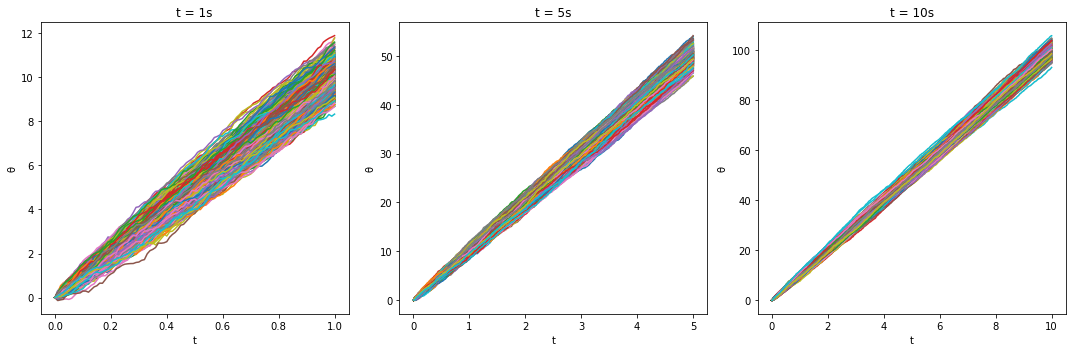

In [26]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in traj_list_1:
    ax[0].plot(time1, i)

for j in traj_list_5:
    ax[1].plot(time5, j)
    
for k in traj_list_10:
    ax[2].plot(time10, k)

ax[0].set_title('t = 1s')
ax[1].set_title('t = 5s')
ax[2].set_title('t = 10s')
ax[0].set_xlabel('t')
ax[0].set_ylabel('θ')
ax[1].set_xlabel('t')
ax[1].set_ylabel('θ')
ax[2].set_xlabel('t')
ax[2].set_ylabel('θ')

plt.tight_layout()
plt.savefig('prob_1b_omega10.png', dpi=300)
plt.show()

In [7]:
element_list1 = []
for i in traj_list_1:
    last_element = i[-1]
    element_list1.append(last_element)
    
element_list5 = []
for j in traj_list_5:
    last_element = j[-1]
    element_list5.append(last_element)
    
element_list10 = []
for k in traj_list_10:
    last_element = k[-1]
    element_list10.append(last_element)

No handles with labels found to put in legend.


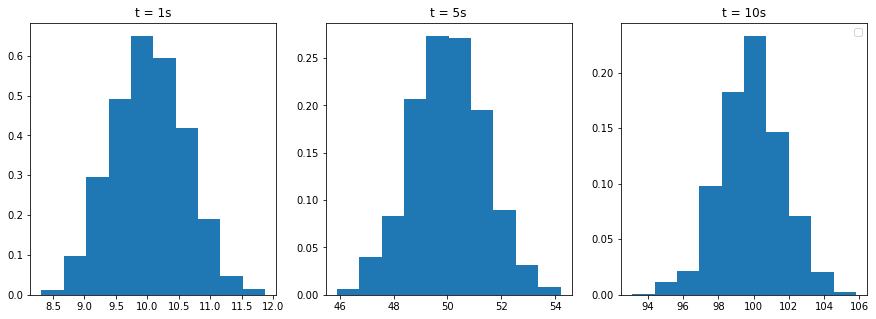

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].hist(element_list1, density=True)
ax[0].set_title('t = 1s')

ax[1].hist(element_list5, density=True)
ax[1].set_title('t = 5s')

ax[2].hist(element_list10, density=True)
ax[2].set_title('t = 10s')

plt.legend()
plt.show()

In [9]:
def analytical(t, start, end):   
    prob_list = []
    theta = np.linspace(start,end,100)
    mean_ = omega*t
    for th in theta:
        prob = np.exp(-(th-mean_)**2/(4*Dr*t))/np.sqrt(4*np.pi*Dr*t)
        prob_list.append(prob)
    return prob_list, theta

In [10]:
analytical_1s, theta_1s = analytical(1, 8, 12)
analytical_5s, theta_5s = analytical(5, 40, 60)
analytical_10s, theta_10s = analytical(10, 90, 110)

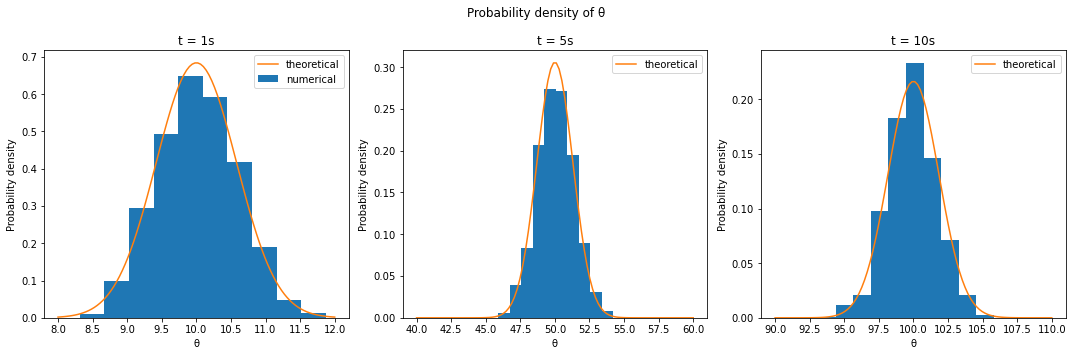

In [25]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].hist(element_list1, density=True, label = 'numerical')
ax[0].plot(theta_1s, analytical_1s, label = 'theoretical')
ax[0].set_title('t = 1s')

ax[1].hist(element_list5, density=True, label = 'numerical')
ax[1].plot(theta_5s, analytical_5s, label = 'theoretical')
ax[1].set_title('t = 5s')

ax[2].hist(element_list10, density=True, label = 'numerical')
ax[2].plot(theta_10s, analytical_10s, label = 'theoretical')
ax[2].set_title('t = 10s')

plt.suptitle('Probability density of θ')
ax[0].set_ylabel('Probability density')
ax[1].set_ylabel('Probability density')
ax[2].set_ylabel('Probability density')
ax[0].set_xlabel('θ')
ax[1].set_xlabel('θ')
ax[2].set_xlabel('θ')

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.tight_layout()
plt.savefig('prob_1b_omega10_2.png', dpi=300)
plt.show()


end

In [12]:
np.mean(element_list10)

99.89839403190248

In [13]:
omega*10

100

In [14]:
np.std(element_list10)

1.7768098061348143

In [15]:
np.sqrt(2*Dr*10)

1.8439088914585775